<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula_17_reconhecendo_digitos_0_e_1_escritos_a_mao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neurais para reconhecer dígitos 0 ou 1 escritos à mão


## Pacotes:

Importaremos aqui os seguintes pacotes:
- [numpy](https://numpy.org/) é o pacote fundamental para computação científica com Python
- [matplotlib](http://matplotlib.org) é uma biblioteca popular para plotar gráficos em Python
- [tensorflow](https://www.tensorflow.org/) é uma plataforma popular para Aprendizado de Máquina em Python

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
# O comando '%matplotlib inline' serve para que os gráficos sejam plotados imediatamente após a célula atual

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


### Definição do Problema

Nessa atividade de programação, você irá usar uma rede neural para reconhecer dois dígitos escritos à mão, 0 ou 1. Trata-se de um problema de classificação binária. Em aulas futuras, iremos estender essa rede para reconhecer todos os 10 dígitos (0-9).

### Conjunto de dados

Começaremos essa atividade carregando os dados

- O conjunto de dados contém 1000 amostras de treinamento de dígitos $^1$, zero ou um.  

    - Cada amostra de treinamento é uma imagem de um dígito em escala cinza com tamanho 20-pixels por 20 pixels
        - Cada pixel é representado por um número de ponto flutuante que indica a intensidade de escala cinza naquele ponto
        - A matriz 20 por 20 de pixels é "desenrolada" num vetor com 400 elementos
        - Cada exemplo de treinamento se torna uma linha na nossa matriz de dados `X`, que possui 400 caracteristicas
        - Isso nos leva à matriz X (1000 x 400), onde cada linha é um exemplo de uma imagem de dígito escrito à mão.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m=1000)}) ---
\end{array}\right)$$

- O conjunto de dados de treinamento também possui vetor `y` com dimensões 1000 x 1, que contém os rótulos corretos para as amostras que estão em `X`
    - `y = 0` indica um dígito `0`, e `y = 1` indica um dígito `1`.

$^1$<sub> Este é um subconjunto do conjunto de dados de dígitos escritos à mão disponível em  (http://yann.lecun.com/exdb/mnist/)</sub>

In [5]:
# Carregando dados
X = np.load("X.npy")
y = np.load("y.npy")
X = X[0:1000]
y = y[0:1000]


#### Olhando as variáveis

Vamos agora nos familiarizar com o conjunto de dados.
- Uma boa forma para começar é dar print de cada variável e ver o que ela contém

O código abaixo dá print dos elementos contidos nas variáveis `X` e `y`

In [6]:
print ('O primeiro elemento de X é: ', X[0])

O primeiro elemento de X é:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [7]:
print ('O primeiro elemento de y é: ', y[0,0])
print ('O último elemento de y é: ', y[-1,0])

O primeiro elemento de y é:  0
O último elemento de y é:  1



#### Apenas checando as dimensões das nossas variáveis

Uma outra forma de nos familiarizarmos com os nossos dados é verificar suas dimensões.

In [8]:
print ('O shape de X é: ' + str(X.shape))
print ('O shape de y é: ' + str(y.shape))

O shape de X é: (1000, 400)
O shape de y é: (1000, 1)


#### Visualizando os dados

- Na célula abaixo, o código seleciona aleatoriamente 64 linhas da matriz `X`, mapeia cada linha de volta para uma imagem em escala cinza 20 por 20 e mostra as imagens todas juntas.
- O rótulo de cada imagem é mostrado acima dela

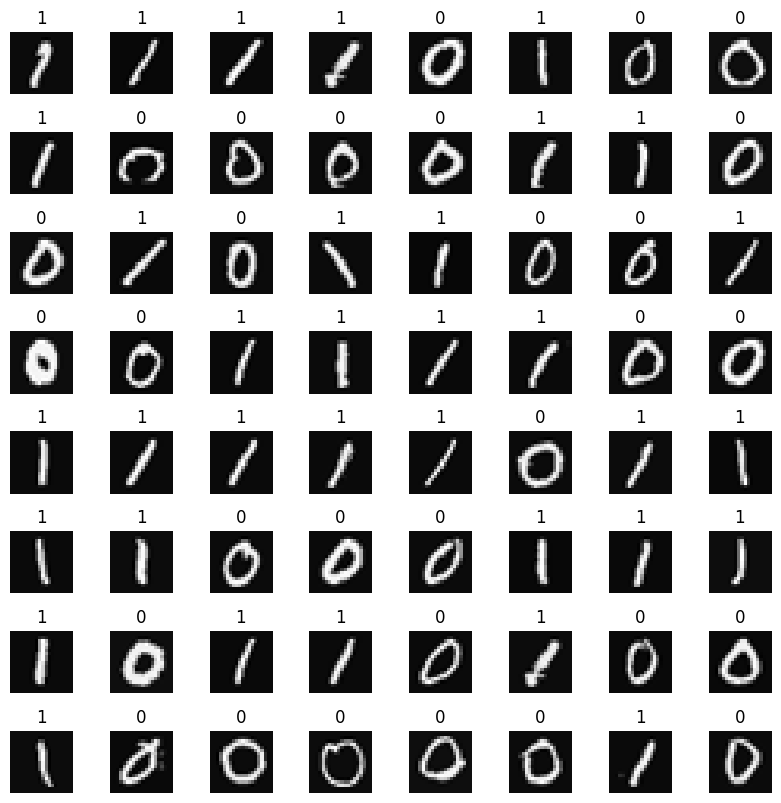

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Você não precisa modificar nada nessa célula

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))  # figura com 8x8=64 gráficos
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Seleciona índices aleatoriamente
    random_index = np.random.randint(m)

    # Seleciona as linhas que correspondem aos índices e refaz o shape da imagem usando a função `reshape`
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Mostra a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Mostra o rótulo da imagem acima da mesma
    ax.set_title(y[random_index,0])
    ax.set_axis_off()


### Representação do modelo

- A rede neural que você irá usar deve possuir 3 camadas do tipo `dense` com ativações do tipo sigmoide.
  - lembre-se que nossas entradas são os valores dos pixels das imagens
  - Uma vez que as imagens são de tamanho $20\times20$, temos um total de $400$ características de entrada
    

- A rede neural deve ter $25$ unidades na camada 1, $15$ unidades na camada 2 e $1$ unidade de saída na camada 3.

    - Lembre-se que as dimensões dos parâmetros de cada camada são conforme a seguir:
        - Se a rede possui uma camada com $s_{out}$ unidades e $s_{in}$ entradas, então
            - $W$ terá dimensão $s_{in} \times s_{out}$.
            - $b$ será um vetor com $s_{out}$ elementos
  
    - Portanto, os shapes de `W` e `b` são:
        - Camada 1: O shape de `W1` é (400, 25) e o shape de `b1` é (25,)
        - Camada 2: O shape de `W2` é (25,15) e o shape de `b2` é (15,)
        - Camada 3: O shape de `W3` é (15,1) e o shape de `b3` é (1,)
        
>**OBS:** O vetor de bias `b` poderia ser representado como uma array 1-D (n,) ou 2-D (n,1). O Tensorflow usa uma representação 1-D e iremos manter essa convenção.               


### Implementação do modelo usando Tensorflow


Abaixo, usamos as funções [Sequential](https://keras.io/guides/sequential_model/) e [Dense](https://keras.io/api/layers/core_layers/dense/) do Keras com uma ativação sigmoide para construir a rede desejada.

In [10]:
modelo = Sequential(
    [
        tf.keras.Input(shape=(400,)),    # especificando a dimensão do vetor de entrada (não é obrigatório especificar)
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ], name = "meu_modelo"   # Na definição do nome do modelo, não pode haver espaços em branco
)


In [11]:
modelo.summary()

Model: "meu_modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

A contagem de parâmetros acima corresponde ao número de elementos w + b do modelo, conforme detalhado abaixo.

In [12]:
num_params_camada1 = 400 * 25 + 25  # parâmetros W1 + parâmetros b1
num_params_camada2 = 25 * 15 + 15   # parâmetros W2 + parâmetros b2
num_params_camada3 = 15 * 1 + 1     # parâmetros W3 + parâmetros b3
print("Número param. camada 1 = ", num_params_camada1, ", Número param. camada 2 = ", num_params_camada2, ",  Número param. camada 3 = ", num_params_camada3 )

Número param. camada 1 =  10025 , Número param. camada 2 =  390 ,  Número param. camada 3 =  16


Vamos examinar agora com cuidado os pesos para verificar se o Tensorflow produziu as mesmas dimensões que nós havíamos calculado anteriormente.

In [13]:
[camada1, camada2, camada3] = modelo.layers

In [14]:
#### Examinando os shapes dos pesos
W1,b1 = camada1.get_weights()
W2,b2 = camada2.get_weights()
W3,b3 = camada3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


O código a seguir define uma função de perda e roda o método do gradiente para ajustar os pesos do modelo aos dados de treinamento (detalhes específicos acerca desses comandos ainda serão abordados).

In [15]:
modelo.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

modelo.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6482
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4379 
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2777 
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1839 
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1295 
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0959 
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0868 
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0700 
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0548 
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0537
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0359 
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333 
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 
Epoch 

Para rodar o modelo para uma amostra para fazer uma previsão, usamos a função do Keras [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). A entrada da função `predict` é uma array 2-D, por isso usamos a função reshape abaixo.

In [16]:
previsao = modelo.predict(X[0].reshape(1,400))  # um 0
print(f" probabilidade de ser 1: {previsao}")
previsao = modelo.predict(X[500].reshape(1,400))  # um 1
print(f" probabilidade de ser 1:  {previsao}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
 probabilidade de ser 1: [[0.0198516]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
 probabilidade de ser 1:  [[0.9906767]]


Assim como na Regressão Logística, podemos comparar a probabilidade com um valor de limiar para fazer uma previsão final

In [17]:
if previsao >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"previsao após limiar: {yhat}")

previsao após limiar: 1


Vamos agora comparar as previsões com os valores alvo para 64 dígitos aleatoriamente selecionados.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

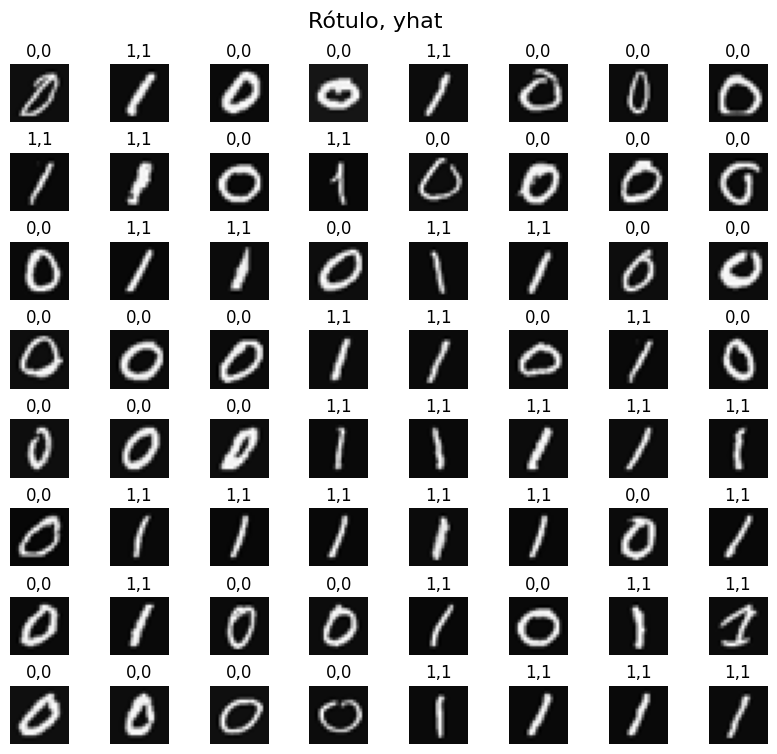

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8)) # figura com 8x8=64 gráficos
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat): # passando por todos os 64 gráficos da figura
    # Seleciona aleatoriamente um índice entre 0 e m
    random_index = np.random.randint(m)

    # abaixo selecionamos a linha que corresponde ao índice e fazemos o reshape da imagem
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # mostramos a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Previsão usando a nossa rede neural
    prediction = modelo.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Mostra o rótulo e a previsão sobre a imagem
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Rótulo, yhat", fontsize=16)
plt.show()

### Implementando a propagação para frente usando apenas o NumPy

Conforme vimos na parte teórica, é possível construir nossa própria versão de uma camada de rede neural do tipo dense, usando apenas o Numpy. Essa função pode então ser utilizada para construir uma rede neural com múltiplas camadas.


Abaixo, nós construímos nossa própria função que implementa os cálculos para uma camada do tipo dense. Nesse sentido, nós utilizamos um loop for para visitar cada unidade (`j`) da camada e performamos o produto escalar com os pesos (`W[:,j]`) para aquela unidade e somamos o termo de bias (`b[j]`) para formar `z`.

Uma ativação `g(z)` é então aplicada sobre o resultado (no nosso caso, essa ativação é a função sigmoide).

In [19]:
def minha_camada_dense(a_in, W, b, g):
    """
    Calculada camada do tipo dense
    Argumentos:
      a_in (ndarray (n, )) : Dados de entrada da camada
      W    (ndarray (n,j)) : Matriz de pesos, com n caracteristicas por unidade, j unidades
      b    (ndarray (j, )) : Vetor de bias, com j unidades
      g    Função de ativação (por exemplo: sigmoid, relu..)
    Retorna
      a_out (ndarray (j,))  : j unidades
    """
    unidades = W.shape[1]
    a_out    = np.zeros(unidades)
    for i in range(unidades):
        w        = W[:,i]
        z        = np.dot(w,a_in) + b[i]
        a_out[i] = g(z)
    return(a_out)


def sigmoid(x):
    z = 1. / (1. + np.exp(-x))
    return z

In [20]:
# Checagem rápida da implementação:
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 exemplo, 2 características)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 características de entrada, 3 características de saída)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 características)
A_tst = minha_camada_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


**Resultado Esperado**
```
[0.54735762 0.57932425 0.61063923]
```

As células seguintes constroem sequencialmente uma rede neural de três camadas utilizando a função `minha_camada_dense` que acabamos de criar


In [21]:
def minha_sequencial(x, W1, b1, W2, b2, W3, b3):
    a1 = minha_camada_dense(x,  W1, b1, sigmoid)
    a2 = minha_camada_dense(a1, W2, b2, sigmoid)
    a3 = minha_camada_dense(a2, W3, b3, sigmoid)
    return(a3)

Podemos copiar os pesos treinados pelo Tensorflow:

In [22]:
W1_tmp,b1_tmp = camada1.get_weights()
W2_tmp,b2_tmp = camada2.get_weights()
W3_tmp,b3_tmp = camada3.get_weights()

In [23]:
# fazendo previsões
previsao = minha_sequencial(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if previsao >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " rótulo = ", y[0,0])
previsao = minha_sequencial(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if previsao >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " rótulo = ", y[500,0])

yhat =  0  rótulo =  0
yhat =  1  rótulo =  1


Rode a célula abaixo para ver as previsões feitas pelo modelo NumPy e pelo modelo Tensorflow. Isso leva um tempo para rodar.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


<ipython-input-24-3f725824f8fd>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  meu_yhat       = int(minha_previsao >= 0.5)
<ipython-input-24-3f725824f8fd>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat     = int(tf_previsao >= 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

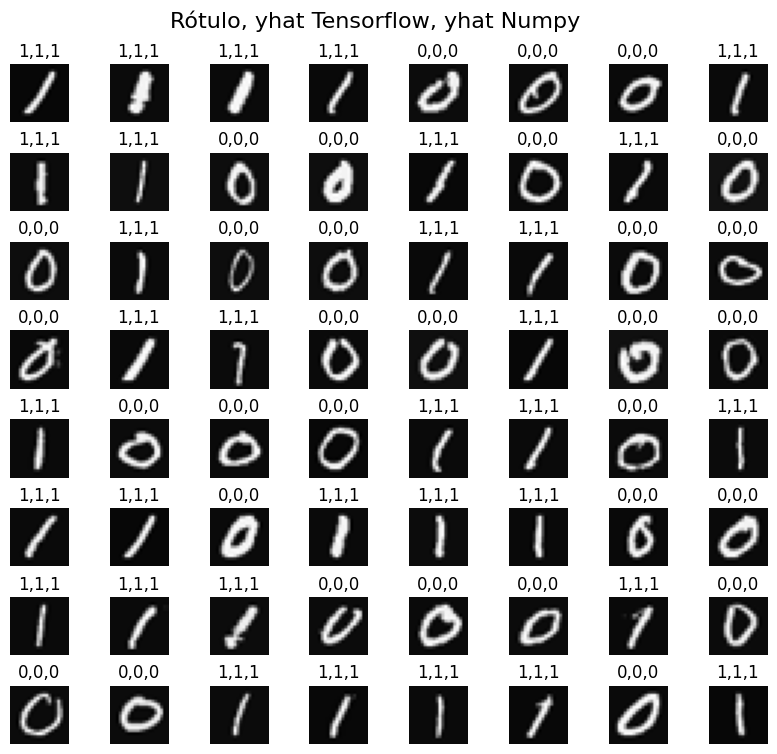

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

    random_index = np.random.randint(m) # valor inteiro entre [0; 63]

    X_random_reshaped = X[random_index].reshape((20,20)).T # .T significa transposto

    # Mostra a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Previsão usando a rede neural implementada usando NumPy
    minha_previsao = minha_sequencial(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    meu_yhat       = int(minha_previsao >= 0.5)

    # Previsão usando a rede neural implementada usando Tensorflow
    tf_previsao = modelo.predict(X[random_index].reshape(1,400))
    tf_yhat     = int(tf_previsao >= 0.5)

    # Mostra o rótulo e as previsões finais sobre cada imagem
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{meu_yhat}")
    ax.set_axis_off()
fig.suptitle("Rótulo, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()


### Implementação NumPy VETORIZADA

Para tornar os cálculos números da propagação para frente mais rápidos, uma implementação com vetorização pode ser utilizada.

Abaixo é descrito como as 25 saídas da camada 1 (que possui 400 valores de entrada) podem ser simultaneamente calculadas usando operações matriciais. Isso é feito usando um dos exemplos de treinamento em `X` e os parâmetros `W1`,`b1`. A função `np.matmul` é usada para realizar a multiplicação de matrizes.

In [25]:
x = X[0].reshape(-1,1)         # primeira amostra de treinamento: vetor coluna (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


Podemos avançar ainda mais no nosso cálculo com vetorização, computando as saídas para **todos os exemplos de treinamento** usando uma única operação matricial Isso é feito no código abaixo, onde implementamos a função `minha_camada_dense_vetorizada`.

A operação completa é $\mathbf{Z}=\mathbf{AW}+\mathbf{b}$. Note que ela acaba utilizando a capacidade de 'broadcasting' do NumPy para expandir $\mathbf{b}$ para $m$ linhas.

In [26]:
def minha_camada_dense_vetorizada(A_in, W, b, g):
    """
    Calcula camada do tipo dense de forma vetorizada
    Argumentos:
      A_in (ndarray (m,n)) : Dados, com m amostras e n características cada
      W    (ndarray (n,j)) : Matriz de pesos, com n caracteristicas por unidade, j unidades
      b    (ndarray (j, )) : Vetor de bias, com j unidades
      g    Função de ativação (por exemplo: sigmoid, relu..)
    Retorna
      A_out (ndarray (m,j)) : m amostras, j unidades
    """

    A_out = g(np.matmul(A_in,W) + b)

    return(A_out)

In [27]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 exemplos, 2 características)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 características de entrada, 3 características de saída)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 características)
A_tst = minha_camada_dense_vetorizada(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


**Resultado Esperado**

```
[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]
 ```

A célula seguinte cria a função sequencial que possibilita a criação da rede neural de três camadas usando a função que acabamos de programar.

In [28]:
def minha_sequencial_vetorizada(X, W1, b1, W2, b2, W3, b3):
    A1 = minha_camada_dense_vetorizada(X,  W1, b1, sigmoid)
    A2 = minha_camada_dense_vetorizada(A1, W2, b2, sigmoid)
    A3 = minha_camada_dense_vetorizada(A2, W3, b3, sigmoid)
    return(A3)

Carregando novamente os pesos treinados usando Tensorflow.

In [29]:
W1_tmp,b1_tmp = camada1.get_weights()
W2_tmp,b2_tmp = camada2.get_weights()
W3_tmp,b3_tmp = camada3.get_weights()

Agora faremos uma previsão baseando-nos em *todas as 1000 amostras simultaneamente*. Note o shape da saída

In [30]:
Previsao = minha_sequencial_vetorizada(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Previsao.shape

(1000, 1)

Abaixo nós aplicamos o valor de limiar de 0.5 para todas as previsões de uma vez só.

In [31]:
Yhat = (Previsao >= 0.5).astype(int)

print("Prevendo um zero: ",Yhat[0], "Prevendo um 1: ", Yhat[500])

Prevendo um zero:  [0] Prevendo um 1:  [1]


Rode a célula seguinte para ver previsões. Ela usará as previsões que nós acabamos de calcular.

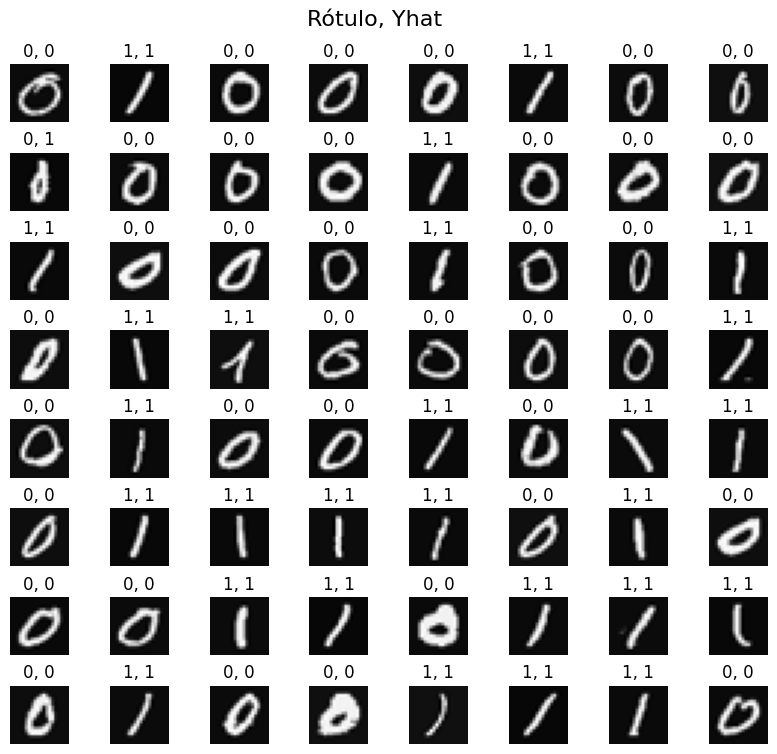

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):

    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off()
fig.suptitle("Rótulo, Yhat", fontsize=16)
plt.show()

Vamos agora buscar e ver um dígito classificado erroneamente pelo nosso modelo.

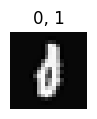

In [33]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y != Yhat)
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()


### Parabéns!

Você construiu e utilizou uma rede neural para classificação binária!